In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("./data/wholetime.csv")

In [4]:
# dfに曜日のカラムを追加
df['dayofweek'] = pd.to_datetime(df['started_at']).dt.dayofweek
df['dayofweek'] = df['dayofweek'].replace({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
df.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng,dayofweek
0,41.9322,-87.6586,152.0,Lincoln Ave & Diversey Pkwy,2020-04-26 18:12:03,member,A847FADBBC638E45,docked_bike,41.8964,-87.6610,86,Eckhart Park,2020-04-26 17:45:14,3.981346,"(41.8964, -87.661)","(41.9322, -87.6586)",Sun
1,41.9306,-87.7238,499.0,Kosciuszko Park,2020-04-17 17:17:03,member,5405B80E996FF60D,docked_bike,41.9244,-87.7154,503,Drake Ave & Fullerton Ave,2020-04-17 17:08:54,0.979629,"(41.9244, -87.7154)","(41.9306, -87.7238)",Fri
2,41.8679,-87.6230,255.0,Indiana Ave & Roosevelt Rd,2020-04-01 18:08:36,member,5DD24A79A4E006F4,docked_bike,41.8945,-87.6179,142,McClurg Ct & Erie St,2020-04-01 17:54:13,2.984661,"(41.8945, -87.6179)","(41.8679, -87.623)",Wed
3,41.8992,-87.6722,657.0,Wood St & Augusta Blvd,2020-04-07 13:02:31,member,2A59BBDF5CDBA725,docked_bike,41.9030,-87.6975,216,California Ave & Division St,2020-04-07 12:50:19,2.141375,"(41.903, -87.6975)","(41.8992, -87.6722)",Tue
4,41.9695,-87.6547,323.0,Sheridan Rd & Lawrence Ave,2020-04-18 11:15:54,casual,27AD306C119C6158,docked_bike,41.8902,-87.6262,125,Rush St & Hubbard St,2020-04-18 10:22:59,9.119685,"(41.8902, -87.6262)","(41.9695, -87.6547)",Sat


In [5]:
# dfから月曜日のデータをランダムに1件だけ抽出
df_mon = df[df['dayofweek'] == 'Mon'].sample(n=1000)
df_tue = df[df['dayofweek'] == 'Tue'].sample(n=1000)
df_wed = df[df['dayofweek'] == 'Wed'].sample(n=1000)
df_thu = df[df['dayofweek'] == 'Thu'].sample(n=1000)
df_fri = df[df['dayofweek'] == 'Fri'].sample(n=1000)
df_sat = df[df['dayofweek'] == 'Sat'].sample(n=1000)
df_sun = df[df['dayofweek'] == 'Sun'].sample(n=1000)

In [14]:
# df_monのstaeted_atをdatetime型に変換
df_mon['started_at'] = pd.to_datetime(df_mon['started_at'])
# df_monを1日毎に集計
df_mon_desc = df_mon.groupby(df_mon['started_at'].dt.date).count()
# df_mon_descの中で一番大きい日付を取得
mon_max = df_mon_desc['started_at'].idxmax()
mon_max

datetime.date(2021, 9, 6)

In [15]:
# 2021年9月6日のデータを抽出
df_mon = df_mon[df_mon['started_at'].dt.date == mon_max]
df_mon.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng,dayofweek
13527439,41.884679,-87.627975,TA1305000029,State St & Randolph St,2021-09-06 02:54:18,casual,3E7C3B09930887D8,classic_bike,41.884679,-87.627975,TA1305000029,State St & Randolph St,2021-09-06 01:41:03,0.000000,"(41.884678982069246, -87.62797504663467)","(41.884678982069246, -87.62797504663467)",Mon
13949664,41.925905,-87.649260,TA1309000058,Lincoln Ave & Fullerton Ave,2021-09-06 07:48:18,member,1C5D99CC40950A66,classic_bike,41.957867,-87.649505,13379,Clarendon Ave & Gordon Ter,2021-09-06 07:35:22,3.550094,"(41.95786652415174, -87.64950513839722)","(41.925905, -87.64926)",Mon
13618241,41.961670,-87.654640,TA1307000107,Sheridan Rd & Montrose Ave,2021-09-06 08:16:06,casual,78D0C1D0FF26B63A,classic_bike,41.954341,-87.686080,KA1504000158,Oakley Ave & Irving Park Rd,2021-09-06 08:03:33,2.730676,"(41.95434085219, -87.6860796243)","(41.96167, -87.65464)",Mon
14008003,41.929546,-87.643118,TA1305000014,Clark St & Wrightwood Ave,2021-09-06 10:56:47,member,C94E0C0704A685CB,classic_bike,41.932590,-87.665936,13294,Greenview Ave & Diversey Pkwy,2021-09-06 10:45:07,1.922513,"(41.93258963429789, -87.66593635082245)","(41.929546, -87.643118)",Mon
14067008,42.020828,-87.665002,523,Eastlake Ter & Rogers Ave,2021-09-06 11:19:47,casual,6456C5D2D05AD8CE,electric_bike,42.032497,-87.679214,E002,Chicago Ave & Washington St,2021-09-06 11:04:09,1.750794,"(42.03249733333333, -87.67921366666667)","(42.020828, -87.66500183333333)",Mon


In [16]:
len(df_mon)

18

In [35]:
# Get the node_list, edge_list and timestamp
def return_nm_intra(df):
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    # started_atで昇順にソート
    df = df.sort_values(by='started_at')
    current_timestamp = df['started_at'].min()
    end_timestamp = df["started_at"].max()
    interval = timedelta(minutes=10)

    node_list = []
    edge_list = []
    timestamp = []

    while current_timestamp <= end_timestamp:
        timestamp.append(current_timestamp)
        next_timestamp = current_timestamp + interval
        df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

        # node_listにはユニークなstart_station_idを追加
        node_list.append(len(df_tmp['start_station_id'].unique()))

        # edge_listにはdf_tmpの行数を追加
        edge_list.append(len(df_tmp))

        current_timestamp = next_timestamp

    # node_listとedge_listで0の値を削除
    node_list = np.array(node_list)
    edge_list = np.array(edge_list)
    timestamp = np.array(timestamp)
    active_node_list = node_list[node_list != 0]
    edge_list = edge_list[edge_list != 0]
    # timestamp = timestamp[:len(node_list)]
    
    return active_node_list, edge_list, timestamp

In [36]:
mon_node_list, mon_edge_list, mon_timestamp = return_nm_intra(df_mon)
# tue_node_list, tue_edge_list, tue_timestamp = return_nm_intra(df_tue)
# wed_node_list, wed_edge_list, wed_timestamp = return_nm_intra(df_wed)
# thu_node_list, thu_edge_list, thu_timestamp = return_nm_intra(df_thu)
# fri_node_list, fri_edge_list, fri_timestamp = return_nm_intra(df_fri)
# sat_node_list, sat_edge_list, sat_timestamp = return_nm_intra(df_sat)
# sun_node_list, sun_edge_list, sun_timestamp = return_nm_intra(df_sun)

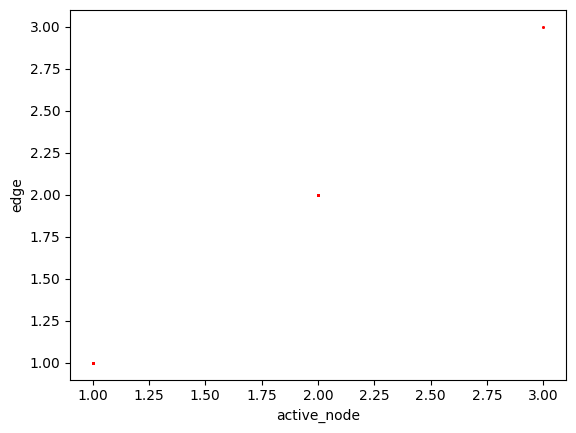

In [38]:
# mon_node_listとmon_edge_listの散布図
plt.scatter(mon_node_list, mon_edge_list, s=1, c='red', label='Mon')
plt.xlabel('active_node')
plt.ylabel('edge')
# plt.xscale('log')
# plt.yscale('log')
plt.show()


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,